In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Conv2D,MaxPooling2D
from keras.layers import LSTM, SimpleRNN

In [3]:
import numpy as np
a = open("mydata_shuffle_input.csv")
inputs = np.genfromtxt(a, delimiter=",")
inputs = inputs.reshape(inputs.shape[0],28,28,1)


In [4]:
c = open("mydata_shuffle_target.csv")
targets = np.genfromtxt(c, delimiter=",")

In [5]:

train_input = []

train_label = []

for i in range(800):
    
    train_input.append(list(inputs[i]))
    
    train_label.append(targets[i])

    
test_input = []

test_label = []

for i in range(800,1000):
    
    test_input.append(list(inputs[i]))
    
    test_label.append(targets[i])
#train_informations = train_informations/100

#test_informations = test_informations/100

train_input = np.asarray(train_input)
test_input = np.asarray(test_input)
train_label = np.asarray(train_label)
test_label = np.asarray(test_label)

xtrain = train_input.reshape(train_input.shape[0],28,28,1)

xtest = test_input.reshape(test_input.shape[0],28,28,1)

ytrain = train_label

ytest = test_label

print(ytrain[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
num = []
for i in range(len(targets)):
    if targets[i][0] == 1:
        num.append(0)
    if targets[i][1] == 1:
        num.append(1)
    if targets[i][2] == 1:
        num.append(2)
    if targets[i][3] == 1:
        num.append(3)
    if targets[i][4] == 1:
        num.append(4)
    if targets[i][5] == 1:
        num.append(5)
    if targets[i][6] == 1:
        num.append(6)
    if targets[i][7] == 1:
        num.append(7)
    if targets[i][8] == 1:
        num.append(8)
    if targets[i][9] == 1:
        num.append(9)
num = np.asarray(num)        
print(type(num))


<class 'numpy.ndarray'>


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5)
acc_per_fold = []
loss_per_fold = []
acc = []
loss = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets, num):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='tanh', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
     # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=128,
              epochs=50,
              verbose=1)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    #print(f'Score for fold {fold_no}: {rnn_model.metrics_names[0]} of {scores[0]}; {rnn_model.metrics_names[1]} of {scores[1]*100}%')
    #acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    predictions = model.predict(inputs[test])
    classes = np.argmax(predictions, axis = 1)
    print(num[test])
    acc_per_fold.append(accuracy_score(num[test],classes))
    
    print('accuracy is ' + str(accuracy_score(num[test],classes)))
    
  # Generate generalization metrics
    acc.append(history.history['acc'])
    loss.append(history.history['loss'])

  # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Train on 800 samples
Epoch 1/50
800/800 [==============================] - 0s 364us/sample - loss: 1.6136 - acc: 0.4975
Epoch 2/50
800/800 [==============================] - 0s 223us/sample - loss: 0.7530 - acc: 0.7950
Epoch 3/50
800/800 [==============================] - 0s 235us/sample - loss: 0.5853 - acc: 0.8263
Epoch 4/50
800/800 [==============================] - 0s 259us/sample - loss: 0.4576 - acc: 0.8825
Epoch 5/50
800/800 [==============================] - 0s 239us/sample - loss: 0.4047 - acc: 0.9050
Epoch 6/50
800/800 [==============================] - 0s 238us/sample - loss: 0.3633 - acc: 0.9187
Epoch 7/50
800/800 [==============================] - 0s 333us/sample - loss: 0.3197 - acc: 0.9312
Epoch 8/50
800/800 [==============================] - 0s 296us/sample - loss: 0.2906 - acc: 0.9325
Epoch 9/50
800/800 [==============================] - 0s 262us/sample - loss: 0.2580 - acc

D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Training for fold 2 ...
Train on 800 samples
Epoch 1/50
800/800 [==============================] - 0s 303us/sample - loss: 1.7467 - acc: 0.4412
Epoch 2/50
800/800 [==============================] - 0s 230us/sample - loss: 0.7046 - acc: 0.7962
Epoch 3/50
800/800 [==============================] - 0s 244us/sample - loss: 0.5355 - acc: 0.8450
Epoch 4/50
800/800 [==============================] - 0s 232us/sample - loss: 0.4770 - acc: 0.8750
Epoch 5/50
800/800 [==============================] - 0s 264us/sample - loss: 0.4082 - acc: 0.9000
Epoch 6/50
800/800 [==============================] - 0s 258us/sample - loss: 0.3427 - acc: 0.9237
Epoch 7/50
800/800 [==============================] - 0s 243us/sample - loss: 0.2944 - acc: 0.9287
Epoch 8/50
800/800 [==============================] - 0s 225us/sample - loss: 0.2680 - acc: 0.9400
Epoch 9/50
800/800 [==============================] - 0s 261us/sample - loss: 0.2418 - acc

D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Training for fold 3 ...
Train on 800 samples
Epoch 1/50
800/800 [==============================] - 0s 295us/sample - loss: 1.6159 - acc: 0.4913
Epoch 2/50
800/800 [==============================] - 0s 235us/sample - loss: 0.6681 - acc: 0.8037
Epoch 3/50
800/800 [==============================] - 0s 256us/sample - loss: 0.5124 - acc: 0.8662
Epoch 4/50
800/800 [==============================] - 0s 235us/sample - loss: 0.4404 - acc: 0.8838
Epoch 5/50
800/800 [==============================] - 0s 237us/sample - loss: 0.3659 - acc: 0.9025
Epoch 6/50
800/800 [==============================] - 0s 234us/sample - loss: 0.3336 - acc: 0.9125
Epoch 7/50
800/800 [==============================] - 0s 238us/sample - loss: 0.2761 - acc: 0.9375
Epoch 8/50
800/800 [==============================] - 0s 254us/sample - loss: 0.2560 - acc: 0.9400
Epoch 9/50
800/800 [==============================] - 0s 235us/sample - loss: 0.2281 - acc

D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Training for fold 4 ...
Train on 800 samples
Epoch 1/50
800/800 [==============================] - 0s 303us/sample - loss: 1.6556 - acc: 0.4787
Epoch 2/50
800/800 [==============================] - 0s 229us/sample - loss: 0.7264 - acc: 0.7775
Epoch 3/50
800/800 [==============================] - 0s 255us/sample - loss: 0.5619 - acc: 0.8413
Epoch 4/50
800/800 [==============================] - 0s 236us/sample - loss: 0.4712 - acc: 0.8750
Epoch 5/50
800/800 [==============================] - 0s 237us/sample - loss: 0.3983 - acc: 0.8863
Epoch 6/50
800/800 [==============================] - 0s 275us/sample - loss: 0.3467 - acc: 0.9038
Epoch 7/50
800/800 [==============================] - 0s 237us/sample - loss: 0.2918 - acc: 0.9237
Epoch 8/50
800/800 [==============================] - 0s 236us/sample - loss: 0.2623 - acc: 0.9350
Epoch 9/50
800/800 [==============================] - 0s 243us/sample - loss: 0.2391 - acc

D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


------------------------------------------------------------------------
Training for fold 5 ...
Train on 800 samples
Epoch 1/50
800/800 [==============================] - 0s 296us/sample - loss: 1.8758 - acc: 0.4075
Epoch 2/50
800/800 [==============================] - 0s 237us/sample - loss: 0.8455 - acc: 0.7775
Epoch 3/50
800/800 [==============================] - 0s 236us/sample - loss: 0.6581 - acc: 0.8300
Epoch 4/50
800/800 [==============================] - 0s 235us/sample - loss: 0.5378 - acc: 0.8675
Epoch 5/50
800/800 [==============================] - 0s 235us/sample - loss: 0.4630 - acc: 0.8900
Epoch 6/50
800/800 [==============================] - 0s 237us/sample - loss: 0.3906 - acc: 0.9038
Epoch 7/50
800/800 [==============================] - 0s 255us/sample - loss: 0.3457 - acc: 0.9212
Epoch 8/50
800/800 [==============================] - 0s 238us/sample - loss: 0.2997 - acc: 0.9388
Epoch 9/50
800/800 [==============================] - 0s 236us/sample - loss: 0.2671 - acc

D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
D:\anaconda\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [8]:

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.304042621254921 - Accuracy: 0.895%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.3318784338235855 - Accuracy: 0.905%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.25432632058858873 - Accuracy: 0.92%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.2697135519981384 - Accuracy: 0.925%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.38117236375808716 - Accuracy: 0.91%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.9110000000000001 (+- 0.01067707825203132)
> Loss: 0.30822665828466417
------------------------------------------------------------------------


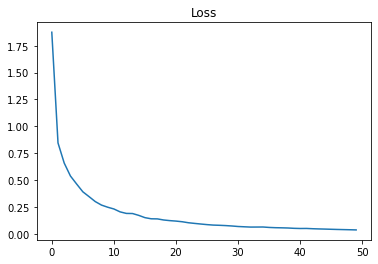

In [9]:
plt.plot(history.epoch,history.history['loss'])
plt.title("Loss")
plt.show()

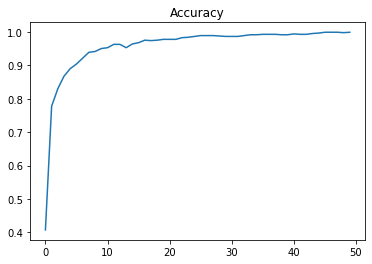

In [10]:
plt.plot(history.epoch,history.history['acc'])
plt.title("Accuracy")
plt.show()

In [11]:

np.savetxt('CNNmydata_cross_validation_acc.csv',acc, delimiter=',')

In [12]:
np.savetxt('CNNmydata_cross_validation_loss.csv',loss, delimiter=',')
